In [83]:
%matplotlib inline

from matplotlib import pyplot as plt
import pandas as pd


In [84]:
mvcnn = (
	pd.concat([
		pd.read_csv('./results/mvcnn_stage_2/logs.csv')
			.assign(epoch=lambda x: x.epoch.astype(int) + 5),
		pd.read_csv('./results/mvcnn_stage_1/logs.csv')
	])
	.sort_values('epoch')
	[['epoch', 'train_acc', 'acc']]
	.rename({
		'train_acc':'mvcnn',
		'acc':'val_mvcnn'
	})
)
mvcnn.columns = ['epoch', 'mvcnn', 'val_mvcnn']
# ----------------------------------------------------------------------------------------
original = (
	pd.read_csv('./results/experiment/sv-log.csv')
	[['epoch', 'capsnet_accuracy', 'val_capsnet_accuracy']]
)
original.columns = ['epoch', 'capsnet', 'val_original_capsnet']
# ----------------------------------------------------------------------------------------
sv_capsnet = (
	pd.read_csv('./results/experiment_mv/sv-log.csv')
	[['epoch', 'capsnet_accuracy', 'val_capsnet_accuracy']]
)
sv_capsnet.columns = ['epoch', 'mv_capsnet', 'val_mv_capsnet']
mv_capsnet = (
	pd.read_csv('./results/experiment_mv/mv-log.csv')
	.assign(epoch=lambda x: x.epoch + 5)
	[['epoch', 'view_pooling_accuracy', 'val_view_pooling_accuracy']]
)
mv_capsnet.columns = ['epoch', 'mv_capsnet', 'val_mv_capsnet']
mv_capsnet = pd.concat([sv_capsnet, mv_capsnet]).sort_values('epoch')
# ----------------------------------------------------------------------------------------
sv_capsnet = (
	pd.read_csv('./results/experiment_mv_cap/experiment/sv-log.csv')
	[['epoch', 'capsnet_accuracy', 'val_capsnet_accuracy']]
)
sv_capsnet.columns =['epoch', 'mv_cap_capsnet1', 'val_mv_cap_capsnet1']
mv_cap_capsnet = (
	pd.read_csv('./results/experiment_mv_cap/experiment/mv-log.csv')
	.assign(epoch=lambda x: x.epoch + 5)
	[['epoch', 'capsnet_accuracy', 'val_capsnet_accuracy']]
)
mv_cap_capsnet.columns = ['epoch', 'mv_cap_capsnet1', 'val_mv_cap_capsnet1']
mv_cap_capsnet1 = pd.concat([sv_capsnet, mv_cap_capsnet]).sort_values('epoch')
# ----------------------------------------------------------------------------------------
sv_capsnet = (
	pd.read_csv('./results/experiment_mv_cap/experiment/sv-log.csv')
	[['epoch', 'capsnet_accuracy', 'val_capsnet_accuracy']]
)
sv_capsnet.columns =['epoch', 'mv_cap_capsnet2', 'val_mv_cap_capsnet2']
mv_cap_capsnet = (
	pd.read_csv('./results/experiment_mv_cap/experiment/mv-log.csv')
	.assign(epoch=lambda x: x.epoch + 5)
	[['epoch', 'capsnet_accuracy', 'val_capsnet_accuracy']]
)
mv_cap_capsnet.columns = ['epoch', 'mv_cap_capsnet2', 'val_mv_cap_capsnet2']
mv_cap_capsnet2 = pd.concat([sv_capsnet, mv_cap_capsnet]).sort_values('epoch')
# ----------------------------------------------------------------------------------------
metrics = (
	mvcnn
	.merge(original, on='epoch')
	.merge(mv_capsnet, on='epoch')
	.merge(mv_cap_capsnet1, on='epoch')
	.merge(mv_cap_capsnet2, on='epoch')
)

trained = metrics.filter(regex=r'^(?!val.*)|epoch')
validated = metrics.filter(regex=r'^(val.*|epoch)')


In [85]:

print(validated.to_latex())
print(trained.to_latex())


\begin{tabular}{lrrrrrr}
\toprule
{} &  epoch &  val\_mvcnn &  val\_original\_capsnet &  val\_mv\_capsnet &  val\_mv\_cap\_capsnet1 &  val\_mv\_cap\_capsnet2 \\
\midrule
0 &    0.0 &   0.791531 &              0.302292 &        0.718333 &             0.479573 &             0.479573 \\
1 &    1.0 &   0.835160 &              0.561875 &        0.768125 &             0.629025 &             0.629025 \\
2 &    2.0 &   0.849466 &              0.630833 &        0.777917 &             0.687466 &             0.687466 \\
3 &    3.0 &   0.857515 &              0.663125 &        0.783958 &             0.714421 &             0.714421 \\
4 &    4.0 &   0.859916 &              0.683125 &        0.800417 &             0.721354 &             0.721354 \\
5 &    5.0 &   0.888393 &              0.674167 &        0.800000 &             0.831981 &             0.831981 \\
6 &    6.0 &   0.880276 &              0.698333 &        0.822500 &             0.848214 &             0.848214 \\
7 &    7.0 &   0.881088 &

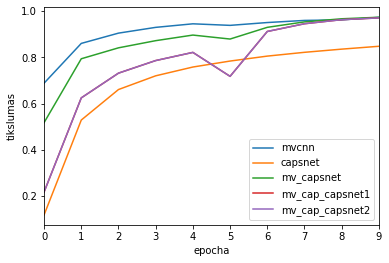

In [88]:
ax = trained.plot(x='epoch', y=trained.columns[1:])
ax.set_xlabel('epocha')
ax.set_ylabel('tikslumas')
plt.savefig('trained.png')

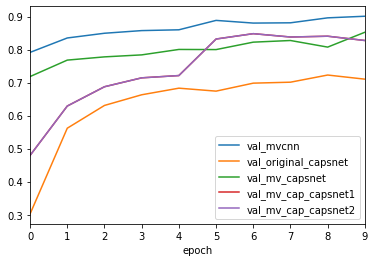

In [89]:
validated.plot(x='epoch', y=validated.columns[1:])
ax.set_xlabel('epocha')
ax.set_ylabel('tikslumas')
plt.savefig('validated.png')